In [6]:
from jupyterthemes import jtplot
jtplot.style(context='notebook', fscale=1.4, spines=True, gridlines='--', ticks=True, grid=True, figsize=(6, 4.5))

In [7]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt

In [8]:
# Funcion para obtener la tanh
def tanh(x):
    return np.tanh(x)

# Funcion para obtener la derivada de tanh x
def dtanh(x):
    return 1.0 - np.tanh(x)**2

# Funcion sigmoide de x
def sigmoide(x):
    return 1/(1+np.exp(-x))

# Funcion para obtener la derivada de de la funcion sigmoide
def dsigmoide(x):
    s = 1/(1+np.exp(-x))
    return s * (1-s)

def Datos_entrenamiento(matriz,x1,xn):
    xin = matriz[:,x1:xn+1]
    return xin

def Datos_validacion(matriz,xji,xjn):
    xjn = matriz[:,xji:xjn+1]
    return xjn

In [9]:
class MLP():
    # constructor
    def __init__(self,xi,d,w_1,w_2,us,uoc,precision,epocas,fac_ap,n_ocultas,n_entradas,n_salida):
        # Variables de inicialización 
        self.xi = np.transpose(xi)
        self.d = d
        self.w1 = w_1
        self.w2 = w_2
        self.us = us
        self.uoc = uoc
        self.precision = precision
        self.epocas = epocas
        self.fac_ap = fac_ap
        self.n_entradas = n_entradas
        self.n_ocultas = n_ocultas
        self.n_salida = n_salida
        # Variables de aprendizaje
        self.di = 0 # Salida deseada en iteracion actual
        self.error_red = 1 # Error total de la red en una conjunto de iteraciones
        self.Ew = 0 # Error cuadratico medio
        self.Error_prev = 0 # Error anterior
        self.Errores = []
        self.Error_actual = np.zeros((len(d))) # Errores acumulados en un ciclo de muestras
        self.Entradas = np.zeros((1,n_entradas))
        self.un = np.zeros((n_ocultas,1)) # Potencial de activacion en neuronas ocultas
        self.gu = np.zeros((n_ocultas,1)) # Funcion de activacion de neuronas ocultas
        self.Y = 0.0 # Potencial de activacion en neurona de salida
        self.y = 0.0 # Funcion de activacion en neurona de salida
        self.epochs = 0
        # Variables de retropropagacion
        self.error_real = 0
        self.ds = 0.0 # delta de salida
        self.docu = np.zeros((n_ocultas,1)) # Deltas en neuronas ocultas
        
    def Operacion(self):
        respuesta = np.zeros((len(self.d),1))
        for p in range(len(self.d)):
            self.Entradas = self.xi[:,p]
            self.Propagar()
            respuesta[p,:] = self.y
        return respuesta.tolist()
    
    def Aprendizaje(self):
        Errores = [] # Almacenar los errores de la red en un ciclo
        while(np.abs(self.error_red) > self.precision):
            self.Error_prev = self.Ew
            for i in range(len(d)):
                self.Entradas = self.xi[:,i] # Senales de entrada por iteracion
                self.di = self.d[i]
                self.Propagar()
                self.Backpropagation()
                self.Propagar()
                self.Error_actual[i] = (0.5)*((self.di - self.y)**2)
            # error global de la red
            self.Error()
            Errores.append(self.error_red)
            self.epochs +=1
            # Si se alcanza un mayor numero de epocas
            if self.epochs > self.epocas:
                break
        # Regresar 
        return self.epochs,self.w1,self.w2,self.us,self.uoc,Errores
                
    
    def Propagar(self):
        # Operaciones en la primer capa
        for a in range(self.n_ocultas):
            self.un[a,:] = np.dot(self.w1[a,:], self.Entradas) + self.uoc[a,:]
        
        # Calcular la activacion de la neuronas en la capa oculta
        for o in range(self.n_ocultas):
            self.gu[o,:] = tanh(self.un[o,:])
        
        # Calcular Y potencial de activacion de la neuronas de salida
        self.Y = (np.dot(self.w2,self.gu) + self.us)
        # Calcular la salida de la neurona de salida
        self.y = tanh(self.Y)
    
    def Backpropagation(self):
        # Calcular el error
        self.error_real = (self.di - self.y)
        # Calcular ds
        self.ds = (dtanh(self.Y) * self.error_real)
        # Ajustar w2
        self.w2 = self.w2 + (np.transpose(self.gu) * self.fac_ap * self.ds)
        # Ajustar umbral us
        self.us = self.us + (self.fac_ap * self.ds)
        # Calcular docu
        self.docu = dtanh(self.un) * np.transpose(self.w2) * self.ds
        # Ajustar los pesos w1
        for j in range(self.n_ocultas):
            self.w1[j,:] = self.w1[j,:] + ((self.docu[j,:]) * self.Entradas * self.fac_ap)
        
        # Ajustar el umbral en las neuronas ocultas
        for g in range(self.n_ocultas):
            self.uoc[g,:] = self.uoc[g,:] + (self.fac_ap * self.docu[g,:])
        
    def Error(self):
        # Error cuadratico medio
        self.Ew = ((1/len(d)) * (sum(self.Error_actual)))
        self.error_red = (self.Ew - self.Error_prev)

Salidas:  [[-0.0009275508233893768], [0.981457061273193], [-0.00026017199883260594], [0.9802359303165205]]


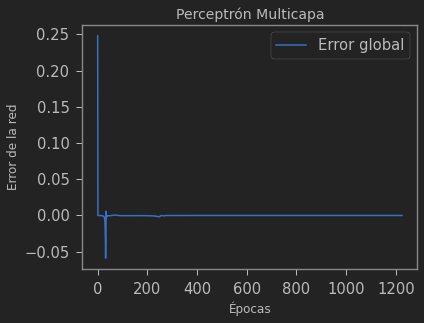

In [10]:
 # Propagama principal
if "__main__"==__name__:
    xls = pd.ExcelFile('XOR.xlsx') # leer archivo excel
    datos = xls.parse('Hoja1') # Hoja de trabajo
    matrix_data = np.array(datos)
    # Datos de entrada
    x_inicio = 0
    x_n = 1
    # Datos de entrada validacion
    xj_inicio = 3
    xj_n = 4
    # Crear vector de entradas xi
    xi = (Datos_entrenamiento(matrix_data,x_inicio,x_n))
    d = matrix_data[:,x_n+1]
    # vector de validación
    xj = (Datos_validacion(matrix_data,xj_inicio,xj_n))
    # Parametros de la red
    f,c = xi.shape
    fac_ap = 0.2
    precision = 0.0000001
    epocas = 10000 #
    epochs = 0
    # Arquitectura de la red
    n_entradas = c # numero de entradas
    cap_ocultas = 1 # Una capa oculta
    n_ocultas = 6 # Neuronas en la capa oculta
    n_salida = 1 # Neuronas en la capa de salida
    # Valor de umbral o bia
    us = 1.0 # umbral en neurona de salida
    uoc = np.ones((n_ocultas,1),float) # umbral en las neuronas ocultas
    # Matriz de pesos sinapticos
    random.seed(0) # 
    w_1 = random.rand(n_ocultas,n_entradas)
    w_2 = random.rand(n_salida,n_ocultas)
    
    #Inicializar la red PMC
    red = MLP(xi,d,w_1,w_2,us,uoc,precision,epocas,fac_ap,n_ocultas,n_entradas,n_salida)
    epochs,w1_a,w2_a,us_a,uoc_a,E = red.Aprendizaje()
    
    # graficar el error
    plt.grid()
    plt.ylabel("Error de la red",fontsize=12)
    plt.xlabel("Épocas",fontsize=12)
    plt.title("Perceptrón Multicapa",fontsize=14)
    x = np.arange(epochs)
    plt.plot(x,E,'b',label="Error global")
    plt.legend(loc='upper right')
    plt.show
    
    # validacion
    red = MLP(xj,d,w1_a,w2_a,us_a,uoc_a,precision,epocas,fac_ap,n_ocultas,n_entradas,n_salida)
    salidas = red.Operacion()
    print("Salidas: ",salidas)

<img src="img/Red.png" alt="drawing" width="600"/>

<img src="img/w.png" alt="drawing" width="600"/>

<img src="img/neurona1.png" alt="drawing" width="600"/>

<img src="img/neurona2.png" alt="drawing" width="600"/>

<img src="img/error.png" alt="drawing" width="600"/>

<img src="img/w2.png" alt="drawing" width="600"/>

<img src="img/ajusteUmbral.png" alt="drawing" width="600"/>

<img src="img/w1.png" alt="drawing" width="600"/>

<img src="img/ajustar.png" alt="drawing" width="600"/>

<img src="img/errorCM.png" alt="drawing" width="600"/>

### Bibliografía:
#### Alberto García Serrano -> Ingeligencia Artificial, Fundamentos, Práctica y Aplicaciones, Alfaomega 2012, Pg. 228
#### Pedro Isasi - Inés Galván -> Redes de Neuronas Artificiales, Un Enfoque Práctico, Pearson Educación 2004